nn
nn
nn

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil, os, zipfile

In [2]:
# reference from this modul course
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip



--2020-10-28 14:00:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.08MB/s    in 67s     

2020-10-28 14:01:41 (4.57 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
# reference from this modul course
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
# tes isi dari folder
os.listdir('/tmp/rockpaperscissors')

['scissors', 'rock', 'rps-cv-images', 'paper', 'README_rpc-cv-images.txt']

In [5]:
# create directory variable of each category

dirname='/tmp/rockpaperscissors/rps-cv-images'
full_path=[]
for i in os.listdir(dirname):
    fullpath=os.path.join(dirname,i)
    if os.path.isfile(fullpath):
      pass
    else:
      full_path.append(fullpath)
scissorsdir=""
paperdir=""
rockdir=""
for i in full_path:
  if "images/rock" in i:
    rockdir=i
  elif "images/scissors" in i:
    scissorsdir = i
  else:
    paperdir=i

print(scissorsdir,paperdir,rockdir)

/tmp/rockpaperscissors/rps-cv-images/scissors /tmp/rockpaperscissors/rps-cv-images/paper /tmp/rockpaperscissors/rps-cv-images/rock


In [6]:
creation=[train_dir,validation_dir,train_dir+'/rock',train_dir+'/paper',train_dir+'/scissor',validation_dir+'/rock',validation_dir+'/paper',validation_dir+'/scissor']
for i in creation:
  try:
    os.makedirs(i)
  except:
    pass

In [7]:
#Split the data 
trainrock, validrock = train_test_split(os.listdir(rockdir), test_size = 0.4)
trainpaper, validpaper = train_test_split(os.listdir(paperdir), test_size = 0.4)
trainscissor, validscissor = train_test_split(os.listdir(scissorsdir), test_size = 0.4)

In [8]:
# Create folder for each category
for i in trainrock:
  shutil.copy(os.path.join(rockdir,i),train_dir+'/rock')

for i in trainpaper:
  shutil.copy(os.path.join(paperdir,i),train_dir+'/paper')

for i in trainscissor:
  shutil.copy(os.path.join(scissorsdir,i),train_dir+'/scissor')

for i in validrock:
  shutil.copy(os.path.join(rockdir,i),validation_dir+'/rock')

for i in validpaper:
  shutil.copy(os.path.join(paperdir,i),validation_dir+'/paper')

for i in validscissor:
  shutil.copy(os.path.join(scissorsdir,i),validation_dir+'/scissor')

In [9]:
# reference from this modul course
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
# reference from this modul course
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [13]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 5s - loss: 1.1340 - accuracy: 0.3700 - val_loss: 1.1021 - val_accuracy: 0.2500
Epoch 2/20
25/25 - 5s - loss: 1.0989 - accuracy: 0.3800 - val_loss: 1.1046 - val_accuracy: 0.3500
Epoch 3/20
25/25 - 5s - loss: 1.0984 - accuracy: 0.4000 - val_loss: 1.0851 - val_accuracy: 0.3000
Epoch 4/20
25/25 - 5s - loss: 1.0434 - accuracy: 0.4800 - val_loss: 0.9880 - val_accuracy: 0.5500
Epoch 5/20
25/25 - 5s - loss: 0.7891 - accuracy: 0.6800 - val_loss: 0.7314 - val_accuracy: 0.6500
Epoch 6/20
25/25 - 5s - loss: 0.7977 - accuracy: 0.6600 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 7/20
25/25 - 5s - loss: 0.5143 - accuracy: 0.8000 - val_loss: 0.4629 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 5s - loss: 0.5678 - accuracy: 0.8400 - val_loss: 0.1847 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 5s - loss: 0.3947 - accuracy: 0.8700 - val_loss: 0.6815 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 5s - loss: 0.4548 - accuracy: 0.7700 - val_loss: 0.3293 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

Saving 1VRzspyXpQ6A2rKy.png to 1VRzspyXpQ6A2rKy.png
scissors


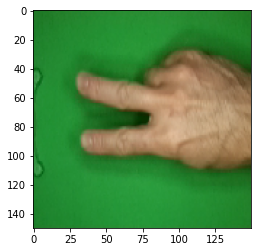

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
if classes[0,0]==1:
  print('paper')
elif classes[0,1]==1:
  print('rock')
elif classes[0,2]==1:
  print('scissors')